In [2]:
#Import du jeux de données, Recuperation des données communes aux deux jeu de données

import pandas as pd
import matplotlib.pyplot as plt

freq = pd.read_csv("frequentation-gares.csv", encoding='utf-8', delimiter=';')

comptage = pd.read_csv("comptage-voyageurs-trains-transilien.csv", encoding='utf-8', delimiter=';')

comptage = comptage[~comptage['Nom gare'].isin(['DREUX','RAMBOUILLET','MONTEREAU','MONTARGIS','GISORS','CREIL','DOURDAN','CREPY EN  VALOIS'])]
# Cette ligne permet de supprimer les aberrations de la regression

transilien= pd.merge(freq, comptage, left_on=freq['Nom de la gare'].str.upper(),right_on=comptage['Nom gare'].str.upper(), how='inner')

comptagecumu= transilien.groupby('Nom de la gare')['Montants'].sum()
freqtot=transilien.groupby('Nom de la gare')['Total Voyageurs 2019'].sum()/transilien.groupby('Nom de la gare').size()


In [3]:
#Faire la regression (linéaire ou Huber)

# from sklearn.linear_model import LinearRegression
# modele_regression = LinearRegression()

import numpy as np
from sklearn.linear_model import HuberRegressor

modele_regression = HuberRegressor()

comptagecumu1=comptagecumu.values.reshape((-1,1))

modele_regression.fit(comptagecumu1, freqtot,sample_weight=1/freqtot)
y_pred = modele_regression.predict(comptagecumu1)

couleurs_specifiques = np.array(['green'])
cles_specifiques = np.array(['Paris Austerlitz', 'Paris Est', 'Paris Gare de Lyon','Paris Montparnasse','Paris Saint-Lazare'])
#grandes gares ayant un traffic grande ligne conséquent non comptabilisé par le comptage transilien

couleurs = np.array(['blue'] * (len(comptagecumu)),dtype='object')
indices_abscisses_specifiques = np.where(np.isin(comptagecumu.index.values, cles_specifiques))[0]
couleurs[indices_abscisses_specifiques] = couleurs_specifiques

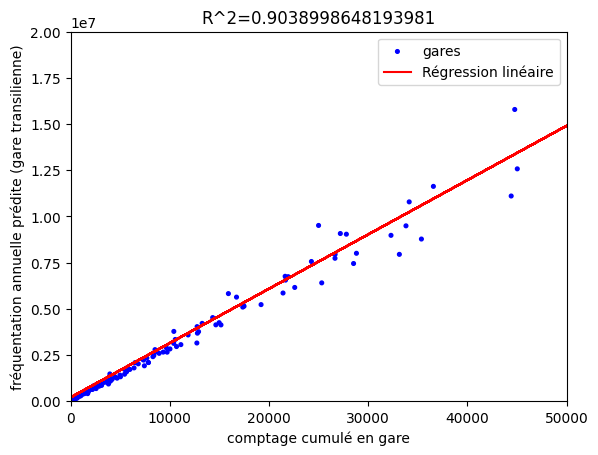

In [6]:
plt.ylim(0,20000000)
plt.xlim(0,50000)
plt.scatter(comptagecumu, freqtot, color=couleurs,s=7, label='gares')
plt.plot(comptagecumu-700, y_pred, color='red', label='Régression linéaire Huber')
plt.title('R^2='+str(modele_regression.score(comptagecumu1, freqtot)))
plt.xlabel('comptage cumulé en gare')
plt.ylabel('fréquentation annuelle prédite (gare transilienne)')
plt.legend()

In [9]:
#obtenir les données de la régression
import statsmodels.api as sm
comptagecumu1 = sm.add_constant(comptagecumu1)
model = sm.OLS(freqtot, comptagecumu1).fit()
results = model.summary()
variable_index = 1
std_err = results.tables[1].data[variable_index + 1][2]
conf_int_lower = results.tables[1].data[variable_index + 1][4]
conf_int_upper = results.tables[1].data[variable_index + 1][5]
print(f"Écart type : {std_err}")

Écart type :     7.721
